In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:20,.2f}'.format)

plt.style.use('seaborn-v0_8')

# Classification

In [2]:
carseats = pd.read_csv('Carseats.csv', index_col=0)
carseats['High'] = (carseats.Sales > 8).map({True: 'Yes', False: 'No'})
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical)
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes,No
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,No
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,No


In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

x = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50,138,73,11,276,120,0,42,17,1,1,Yes
2,11.22,111,48,16,260,83,1,65,10,1,1,Yes
3,10.06,113,35,10,269,80,2,59,12,1,1,Yes
4,7.40,117,100,4,466,97,2,55,14,1,1,No
5,4.15,141,64,3,340,128,0,38,13,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,1,33,14,1,1,Yes
397,6.14,139,23,3,37,120,2,55,11,0,1,No
398,7.41,162,26,12,368,159,2,40,18,1,1,No
399,5.94,100,79,7,284,95,0,50,12,1,1,No


In [4]:
from sklearn.tree import DecisionTreeClassifier

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats.fit(x, y)
y_pred = tree_carseats.predict(x)

tree_carseats.score(x, y)

0.8775

<AxesSubplot: title={'center': 'Feature Importance'}>

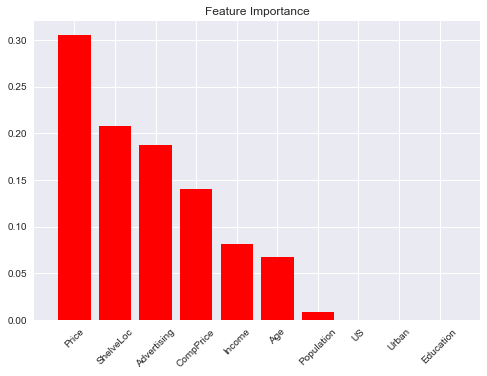

In [6]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(tree_carseats,
                         feature_names = x.columns,
                         x_tick_rotation=45)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=42)

tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(X_train, y_train)
y_pred = tree_carseats_tt.predict(X_test)

tree_carseats_tt.score(X_test, y_test), tree_carseats_tt.score(X_train, y_train)

(0.73, 0.9)

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.71      0.75       117
         Yes       0.65      0.76      0.70        83

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

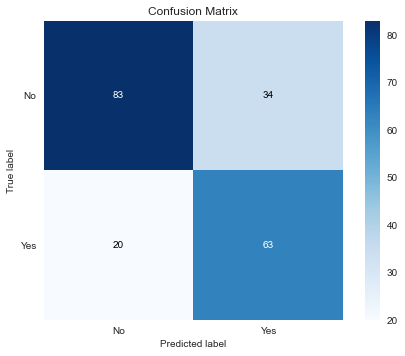

In [9]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, y_pred)

# Regression

In [10]:
boston = pd.read_csv('Boston.csv', index_col=0)

X = boston.loc[:, 'crim':'lstat']
y = boston.loc[:, 'medv']

boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67,22.40
503,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
504,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
505,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


In [11]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

tree_boston = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2)
tree_boston.fit(X_train, y_train)
y_pred = tree_boston.predict(X_test)

tree_boston.score(X_test, y_test), tree_boston.score(X_train, y_train)

(0.6349503884695384, 0.7461422238084278)

# Bagging

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, oob_score=True, random_state=42)
boston_bag.fit(X_train, y_train)

y_pred = boston_bag.predict(X_test)

mean_squared_error(y_test, y_pred)

14.667482976284576

<AxesSubplot: ylabel='medv'>

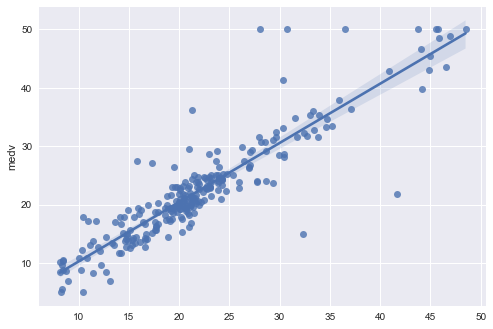

In [14]:
sns.regplot(x=y_pred, y=y_test)

# Random Forest

In [15]:
boston_rf = RandomForestRegressor(max_features=6, oob_score=True, random_state=42, n_estimators=100)
boston_rf.fit(X_train, y_train)

y_pred = boston_rf.predict(X_test)

mean_squared_error(y_test, y_pred)

12.878658150197625

<AxesSubplot: ylabel='medv'>

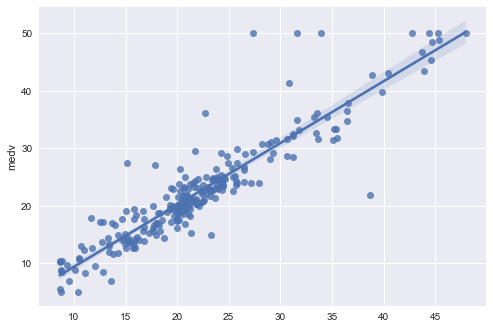

In [16]:
sns.regplot(x=y_pred, y=y_test)

<AxesSubplot: title={'center': 'Feature Importance'}>

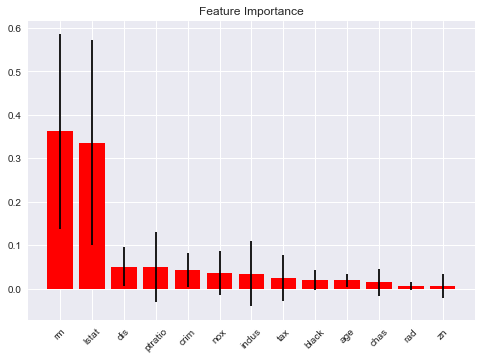

In [17]:
plot_feature_importances(boston_rf,
                         feature_names=X.columns,
                         x_tick_rotation=45)

# Boosting with lr=0.01

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

boston_gb = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=.01, random_state=42)
boston_gb.fit(X_train, y_train)

y_pred = boston_gb.predict(X_test)

mean_squared_error(y_test, y_pred)

26.814622317077628

<AxesSubplot: title={'center': 'Feature Importance'}>

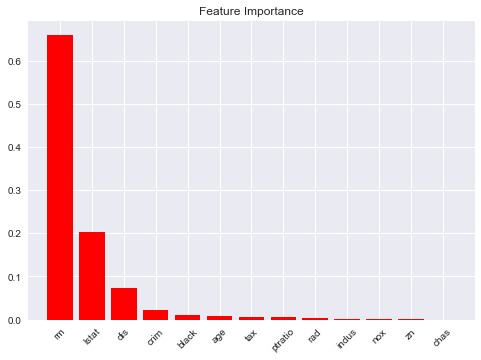

In [19]:
plot_feature_importances(boston_gb,
                         feature_names=X.columns,
                         x_tick_rotation=45)

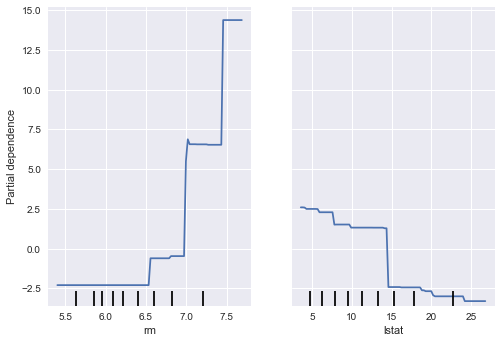

In [21]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(boston_gb, X_train, [5, 12], feature_names=X.columns)

# Boosting with lr=0.5

In [22]:
boston_gb2 = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=.5, random_state=42)
boston_gb2.fit(X_train, y_train)

y_pred = boston_gb2.predict(X_test)

mean_squared_error(y_test, y_pred)

16.821084141584183

<AxesSubplot: title={'center': 'Feature Importance'}>

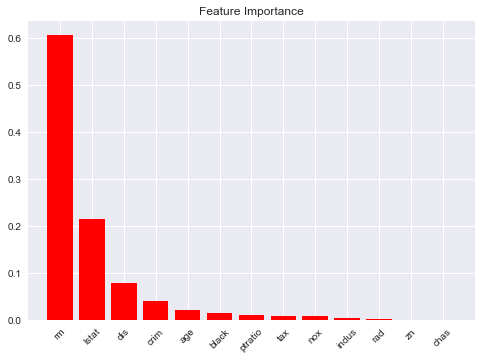

In [23]:
plot_feature_importances(boston_gb2,
                         feature_names=X.columns,
                         x_tick_rotation=45)